<a href="https://colab.research.google.com/github/shruti-sharma12/CV-lab/blob/main/cv(expt6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: SHRUTI SHARMA

PRN: 1032211936

CLASS: TY ECE-AIML

EXPERIMENT 6

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import cv2
import matplotlib.pyplot as plt

In [20]:
img = cv2.imread("/content/drive/MyDrive/Face-Images (1)/Face Images/Final Testing Images/face13/1face13.jpg")

array([[[255, 254, 243],
        [255, 252, 242],
        [255, 247, 240],
        ...,
        [255, 240, 252],
        [255, 242, 248],
        [255, 244, 238]],

       [[255, 252, 244],
        [ 87,  24,  16],
        [110,  20,  13],
        ...,
        [ 89,  16,  26],
        [104,  14,  20],
        [137,  19,  14]],

       [[255, 243, 242],
        [110,  19,  15],
        [184,  92,  87],
        ...,
        [186, 164, 169],
        [217, 146, 149],
        [174,   8,   7]],

       ...,

       [[255, 240, 252],
        [109,  19,  24],
        [206, 136, 129],
        ...,
        [ 75,  84,  58],
        [135,  78,  57],
        [191,   9,   3]],

       [[255, 242, 248],
        [115,  14,  16],
        [241, 135, 128],
        ...,
        [129,  72,  51],
        [168,  62,  45],
        [209,  10,   2]],

       [[255, 244, 238],
        [145,  21,  15],
        [184,   7,   0],
        ...,
        [189,  10,   3],
        [209,  12,   4],
        [231,   0,   0]]], dtype=uint8)
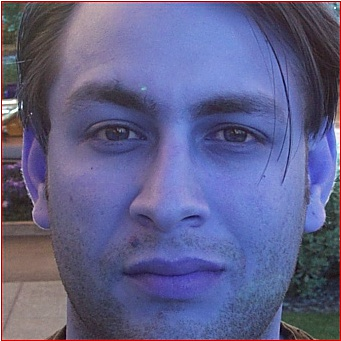

In [21]:
img

In [23]:
import cv2

# Load the image
img = cv2.imread('/content/drive/MyDrive/Face-Images (1)/Face Images/Final Testing Images/face13/1face13.jpg')

# Check if the image is loaded successfully
if img is None:
    print("Error: Unable to load image.")
else:
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Continue with further processing


In [24]:
img_gray.shape

(341, 341)

In [25]:
#load the classifier

face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

In [26]:
#Perform the Face Detection

face = face_classifier.detectMultiScale(
    img_gray, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)

In [27]:
#now we will draw a rectangular bounding box around the face

for (x,y,w,h) in face:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 1)     #4 is the thickness of the boundary of the bounding box

In [28]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 340.5, 340.5, -0.5)

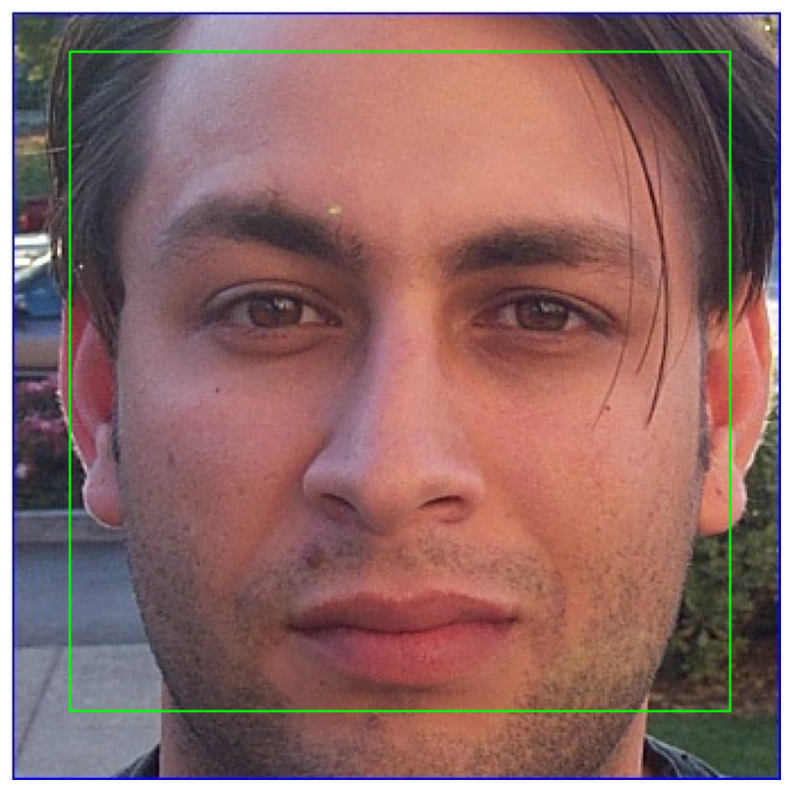

In [29]:
plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

FACE RECOGINITION

In [30]:
trainingImagePath = '/content/drive/MyDrive/Face-Images (1)/Face Images/Final Training Images'
testImagePath = '/content/drive/MyDrive/Face-Images (1)/Face Images/Final Testing Images'

In [31]:
from keras.preprocessing.image import ImageDataGenerator

In [32]:
# Defining pre-processing transformations on raw images of training data
# These hyper parameters helps to generate slightly twisted versions
# of the original image, which leads to a better model, since it learns
# on the good and bad mix of images

train_datagen = ImageDataGenerator(
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True)

In [33]:
#we wont apply any pre processimg on the raw images of the test dataset

test_datagen = ImageDataGenerator()

In [34]:
# Generating the Training Data
training_set = train_datagen.flow_from_directory(
        trainingImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 244 images belonging to 16 classes.


In [35]:

# Generating the Testing Data
test_set = test_datagen.flow_from_directory(
        testImagePath,
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 64 images belonging to 16 classes.


In [36]:
# Printing class labels for each face
test_set.class_indices

{'face1': 0,
 'face10': 1,
 'face11': 2,
 'face12': 3,
 'face13': 4,
 'face14': 5,
 'face15': 6,
 'face16': 7,
 'face2': 8,
 'face3': 9,
 'face4': 10,
 'face5': 11,
 'face6': 12,
 'face7': 13,
 'face8': 14,
 'face9': 15}

In [37]:
# class_indices have the numeric tag for each face
TrainClasses=training_set.class_indices

# Storing the face and the numeric tag for future reference
ResultMap={}
for faceValue,faceName in zip(TrainClasses.values(),TrainClasses.keys()):
    ResultMap[faceValue]=faceName

# Saving the face map for future reference
import pickle
with open("ResultsMap.pkl", 'wb') as fileWriteStream:
    pickle.dump(ResultMap, fileWriteStream)

# The model will give answer as a numeric tag
# This mapping will help to get the corresponding face name for it
print("Mapping of Face and its ID",ResultMap)

# The number of neurons for the output layer is equal to the number of faces
OutputNeurons=len(ResultMap)
print('\n The Number of output neurons: ', OutputNeurons)

Mapping of Face and its ID {0: 'face1', 1: 'face10', 2: 'face11', 3: 'face12', 4: 'face13', 5: 'face14', 6: 'face15', 7: 'face16', 8: 'face2', 9: 'face3', 10: 'face4', 11: 'face5', 12: 'face6', 13: 'face7', 14: 'face8', 15: 'face9'}

 The Number of output neurons:  16


In [38]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense

In [39]:
'''Initializing the Convolutional Neural Network'''
classifier= Sequential()

''' STEP--1 Convolution
# Adding the first layer of CNN
# we are using the format (64,64,3) because we are using TensorFlow backend
# It means 3 matrix of size (64X64) pixels representing Red, Green and Blue components of pixels
'''
classifier.add(Convolution2D(32, kernel_size=(5, 5), strides=(1, 1), input_shape=(64,64,3), activation='relu'))

'''STEP--2 MAX Pooling'''
classifier.add(MaxPool2D(pool_size=(2,2)))

''' ADDITIONAL LAYER of CONVOLUTION for better accuracy'''
classifier.add(Convolution2D(64, kernel_size=(5, 5), strides=(1, 1), activation='relu'))

classifier.add(MaxPool2D(pool_size=(2,2)))

''' STEP--3 FLattening'''
classifier.add(Flatten())

'''STEP--4 Fully Connected Neural Network'''
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(OutputNeurons, activation='softmax'))

'''Compiling the CNN'''
#classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
classifier.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=["accuracy"])



# Starting the model training
classifier.fit(
    training_set,
    steps_per_epoch=8,         #number of steps per epoch = (Total number of training samples / Batch size), here i have 244 training images and the batch size is 32, therefore the steps_per_epochs comes out to be 7.6 = 8
    epochs=15,
    validation_data=test_set,
    validation_steps=10
)

Epoch 1/15
8/8 [==============================] - ETA: 0s - loss: 68.4360 - accuracy: 0.0492

8/8 [==============================] - 100s 13s/step - loss: 68.4360 - accuracy: 0.0492 - val_loss: 9.3859 - val_accuracy: 0.0781
Epoch 2/15
8/8 [==============================] - 3s 360ms/step - loss: 5.0284 - accuracy: 0.0861
Epoch 3/15
8/8 [==============================] - 3s 408ms/step - loss: 2.7749 - accuracy: 0.0328
Epoch 4/15
8/8 [==============================] - 3s 352ms/step - loss: 2.7618 - accuracy: 0.0697
Epoch 5/15
8/8 [==============================] - 3s 353ms/step - loss: 2.5612 - accuracy: 0.2418
Epoch 6/15
8/8 [==============================] - 3s 361ms/step - loss: 1.6863 - accuracy: 0.4672
Epoch 7/15
8/8 [==============================] - 4s 411ms/step - loss: 1.0116 - accuracy: 0.7049
Epoch 8/15
8/8 [==============================] - 3s 357ms/step - loss: 0.5198 - accuracy: 0.8443
Epoch 9/15
8/8 [==============================] - 3s 359ms/step - loss: 0.3183 - accuracy: 0.9139
Epoch 10/15
8/8 [==============================] - 5s 627ms/step - loss: 0.2014 - accu

In [40]:
'''Making single predictions'''
import numpy as np
from keras.preprocessing import image

ImagePath='/content/drive/MyDrive/Face-Images (1)/Face Images/Final Testing Images/face13/2face13.jpg'
test_image=image.load_img(ImagePath,target_size=(64, 64))
test_image=image.img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)

result=classifier.predict(test_image,verbose=0)
#print(training_set.class_indices)


print('Prediction is: ',ResultMap[np.argmax(result)])

Prediction is:  face13
